# Saint Eynard - Refuge du Gouter

> Note: The [Free Space Path Loss](https://en.wikipedia.org/wiki/Free-space_path_loss) is 131.96 dB at 868 MHz for 109 Kms

In [141]:
import matplotlib.pyplot as plt
import pandas as pd

In [142]:
#frames = pd.read_csv('../logs/d1d1e80000000033_refugegouter.csv.gz',sep=';',decimal=',',index_col='Sequence')
frames = pd.read_csv('../logs/d1d1e80000000033_refugegouter.csv.gz',sep=';',decimal=',')

In [143]:
#frames['fCnt'] = frames.index
frames['fCnt'] = frames['Sequence']

In [144]:
# convert the datetime column to a pandas datetime object
frames['Date_Time'] = pd.to_datetime(frames['Date Time'])
frames = frames.sort_values(by=['Date_Time','fCnt'])

In [145]:
frames

,Date Time,Gateway,Direction,Type,DevAddr,DevEUI,Timestamp,Port,Sequence,SF,RSSI,SNR,fCnt,Date_Time
8124,01/07/2023 00:04,MTCD_Refuge_du_Gouter_RightSide,up,UNCONF_DATA_UP,FC00AF46,d1d1e80000000033,3656772339,3,2224,7,-115,-4.0,2224,2023-01-07 00:04:00
8123,01/07/2023 00:34,MTCD_Refuge_du_Gouter_RightSide,up,UNCONF_DATA_UP,FC00AF46,d1d1e80000000033,1173809884,3,2227,7,-116,-4.5,2227,2023-01-07 00:34:00
8122,01/07/2023 00:54,MTCD_Refuge_du_Gouter_RightSide,up,UNCONF_DATA_UP,FC00AF46,d1d1e80000000033,2381802507,3,2229,7,-115,-4.8,2229,2023-01-07 00:54:00
8121,01/07/2023 01:14,MTCD_Refuge_du_Gouter_RightSide,up,UNCONF_DATA_UP,FC00AF46,d1d1e80000000033,3589817387,3,2231,7,-108,-6.5,2231,2023-01-07 01:14:00
8120,01/07/2023 01:24,MTCD_Refuge_du_Gouter_RightSide,up,UNCONF_DATA_UP,FC00AF46,d1d1e80000000033,4193775187,3,2232,7,-116,-4.2,2232,2023-01-07 01:24:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,12/01/2024 23:16,MTCD_Refuge_du_Gouter_RightSide,up,UNCONF_DATA_UP,FC00AF46,d1d1e80000000033,1277162092,3,30247,7,-115,-4.8,30247,2024-12-01 23:16:00
590,12/01/2024 23:16,MTCD_Refuge_du_Gouter_RightSide,up,UNCONF_DATA_UP,FC00AF46,d1d1e80000000033,1274154196,3,30247,7,-116,-6.0,30247,2024-12-01 23:16:00
588,12/01/2024 23:26,MTCD_Refuge_du_Gouter_RightSide,up,UNCONF_DATA_UP,FC00AF46,d1d1e80000000033,1887164483,3,30248,7,-113,-6.5,30248,2024-12-01 23:26:00
587,12/01/2024 23:46,MTCD_Refuge_du_Gouter_RightSide,up,UNCONF_DATA_UP,FC00AF46,d1d1e80000000033,3099482156,3,30250,7,-116,-5.5,30250,2024-12-01 23:46:00


## SNR & RSSI & PER

In [146]:
PER =  (1 - len(frames)/(15137+1-1152));
PER

0.3773773773773774

In [147]:
frames[["RSSI", "SNR"]].describe()

,RSSI,SNR
count,8708.000000,8708.000000
mean,-115.337506,-5.702480
std,1.803964,1.557076
min,-119.000000,-10.500000
25%,-116.000000,-6.800000
50%,-116.000000,-5.800000
75%,-115.000000,-4.800000
max,-99.000000,0.800000


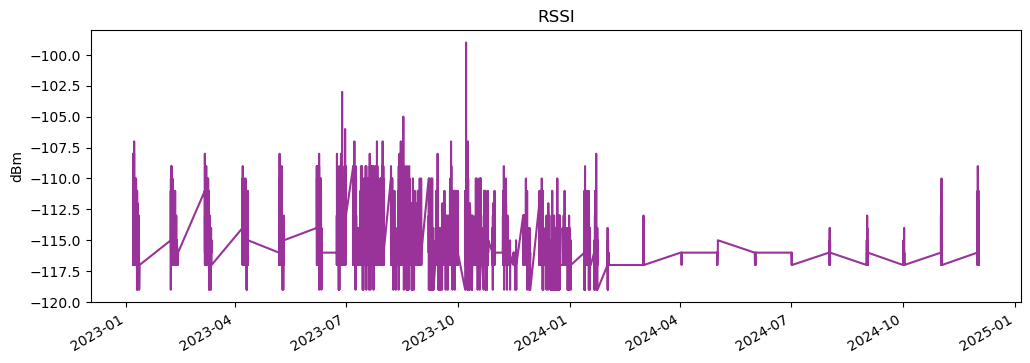

In [148]:
frames.plot(x='Date_Time', y='RSSI', kind='line', rot=30,
        color='purple', alpha=0.8,
        legend=None,
        title='RSSI', xlabel='', ylabel='dBm', fontsize=10, figsize=(12,4));
plt.show()

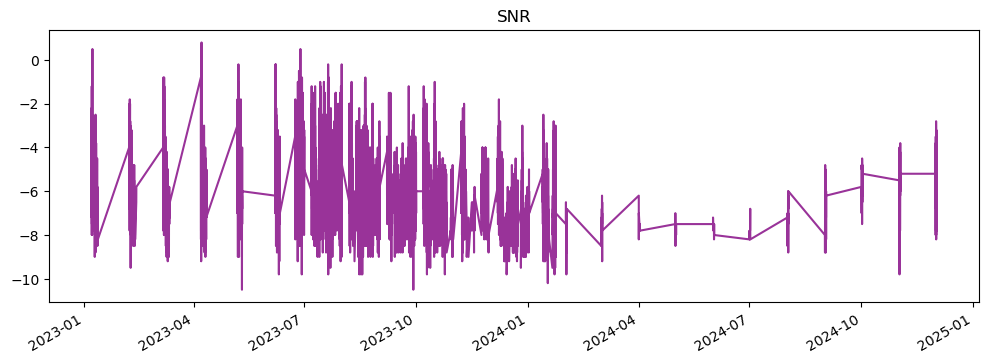

In [149]:
frames.plot(x='Date_Time', y='SNR', kind='line', rot=30,
        color='purple', alpha=0.8,
        legend=None,
        title='SNR', xlabel='', ylabel='', fontsize=10, figsize=(12,4));
plt.show()

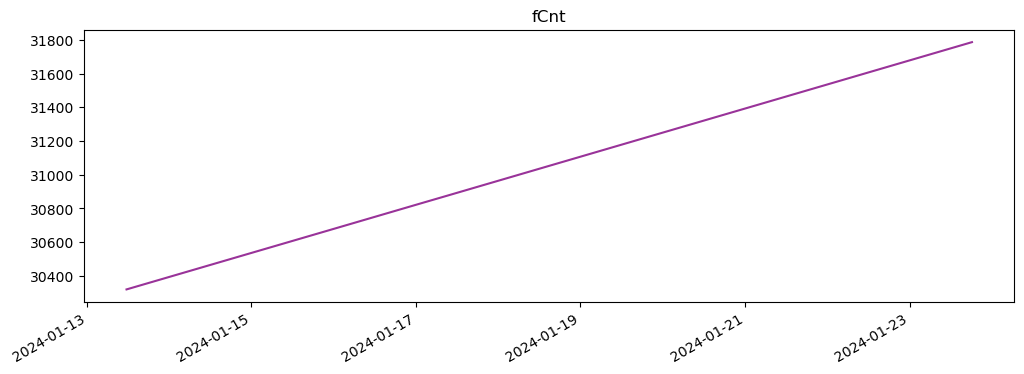

In [150]:
leftside = frames[frames.Gateway == 'MTCD_Refuge_du_Gouter_LeftSide'].reset_index()
leftside.plot(x='Date_Time', y='fCnt', kind='line', rot=30,
        color='purple', alpha=0.8,
        legend=None,
        title='fCnt', xlabel='', ylabel='', fontsize=10, figsize=(12,4));
plt.show()
#fCnt.plot()
#plt.show()

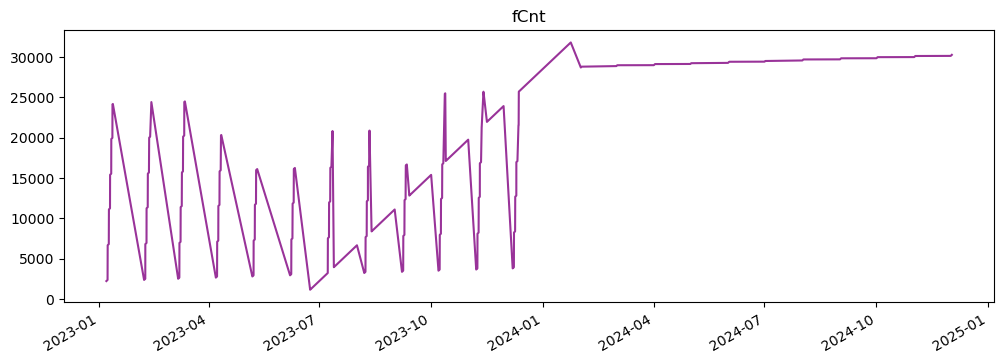

In [151]:
rightside = frames[frames.Gateway == 'MTCD_Refuge_du_Gouter_RightSide'].reset_index()
rightside.plot(x='Date_Time', y='fCnt', kind='line', rot=30,
        color='purple', alpha=0.8,
        legend=None,
        title='fCnt', xlabel='', ylabel='', fontsize=10, figsize=(12,4));
plt.show()
#fCnt.plot()
#plt.show()

## TODO
* [ ] add ESP
* [ ] compute PER

## References
* [Predicting LoRaWAN Capacity](https://lora-developers.semtech.com/documentation/tech-papers-and-guides/predicting-lorawan-capacity/)

In [152]:
# Table 1: Data Rates and Required Signal-to-Noise Ratios in [Predicting LoRaWAN Capacity](https://lora-developers.semtech.com/documentation/tech-papers-and-guides/predicting-lorawan-capacity/)
required_snr = pd.DataFrame(data={ \
    'sf': [5, 6, 7, 8, 9, 10, 11, 12], \
    'snr': [-2.5, -5, -7.5, -10, -12.5, -15, 17.5, -20]})
required_snr

,sf,snr
0,5,-2.5
1,6,-5.0
2,7,-7.5
3,8,-10.0
4,9,-12.5
5,10,-15.0
6,11,17.5
7,12,-20.0


[Free Space Path Loss](https://en.wikipedia.org/wiki/Free-space_path_loss) 

In [153]:
import math
def free_space_path_loss(distance, frequency):
    #frequency is frequency(Hz)
    #distance is meters(m)
    light_speed = 299792458.0 # m/s
    # wavelength  = light_speed /frequency
    return 20 * math.log10((4.0 * math.pi * distance * frequency)/(light_speed))


In [154]:
free_space_path_loss(109000, 868000000)

131.9667076842257

In [155]:
free_space_path_loss(109000, 433000000)

125.92607110776315

In [156]:
free_space_path_loss(109000, 2400000000)

140.80053801492798